<a href="https://colab.research.google.com/github/khushboo-datasci/Time_Series_Sales_Forecasting/blob/main/Time_Series__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project** :
 **Time Series Sales Forecasting**

#**Description:**




* **Forecasted monthly sales (2011–2014) for a company, enabling optimized inventory management and strategic business planning.**

* **Cleaned and preprocessed time series data: handled missing values, aggregated daily sales to monthly, and performed exploratory data analysis.**

* **Conducted `stationarity checks` (ADF test) and applied `Box-Cox transformation` and `differencing` to stabilize variance and mean.**

* **Performed `seasonal decomposition` to analyze trends, seasonality, and residual patterns in sales data.**

* **Built, tuned, and compared `AR, ARIMA, and SARIMA` models in Python (statsmodels) for accurate forecasting.**

* **Evaluated model performance using `RMSE` and `MAPE`, selecting the best model to guide inventory decisions.**

* **Visualized trends and model predictions, providing actionable insights that improved inventory planning and reduced overstock/understock risks.**




---






#Tools & Libraries :
**Python, pandas, numpy, matplotlib, seaborn, statsmodels, scipy**

# Problem Statement

**Forecasted future sales of a company (2011–2014) to optimize inventory management and support strategic business planning.**


**Step-1**

Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Superstore_Data (1).csv')

In [ ]:
df.head(5)

,Order Date,Sales,Profit
0,17-10-2013,5175.171,919.971
1,07-11-2011,1822.080,564.840
2,14-04-2012,5244.840,996.480
3,06-06-2013,3701.520,1036.080
4,25-02-2012,1878.720,582.360


As you can see, the data type of the *`Order Date`* column is *object*. But to further conduct analyses on the data, such as grouping by month or year, we have to convert the data type of the *`Order Date`* column to *`datetime`*.

In [ ]:
df.dtypes

,0
Order Date,object
Sales,float64
Profit,float64


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.dtypes

,0
Order Date,datetime64[ns]
Sales,float64
Profit,float64


Let's make sure that the data points in the data frame are ordered by date.

In [ ]:
df.sort_values(by='Order Date', inplace=True)

In [ ]:
df.head()

,Order Date,Sales,Profit
5073,2011-01-01,55.242,15.342
3056,2011-01-01,120.366,36.036
4083,2011-01-01,113.670,37.770
424,2011-01-03,912.456,-319.464
5517,2011-01-03,6.006,0.546


In [ ]:
df.reset_index(drop=True)

,Order Date,Sales,Profit
0,2011-01-01,55.2420,15.3420
1,2011-01-01,120.3660,36.0360
2,2011-01-01,113.6700,37.7700
3,2011-01-03,912.4560,-319.4640
4,2011-01-03,6.0060,0.5460
...,...,...,...
5694,2014-12-30,8.5407,2.3607
5695,2014-12-30,255.2850,-47.6550
5696,2014-12-30,10.8540,-6.6960
5697,2014-12-31,300.2400,84.0600


We will set the updated *`Order Date`* feature as the index of the data frame.

In [ ]:
df.set_index('Order Date',inplace=True)

In [ ]:
df.head()

,Sales,Profit
Order Date,,
2011-01-01,55.242,15.342
2011-01-01,120.366,36.036
2011-01-01,113.670,37.770
2011-01-03,912.456,-319.464
2011-01-03,6.006,0.546


In [ ]:
df.loc['2011-01-03']

,Sales,Profit
Order Date,,
2011-01-03,912.4560,-319.4640
2011-01-03,6.0060,0.5460
2011-01-03,159.4440,-95.6760
2011-01-03,135.1182,-45.9018
2011-01-03,211.1805,-70.3995
2011-01-03,69.3000,3.4200
2011-01-03,337.6395,-122.8005
2011-01-03,68.8680,-26.4120


**Note:** When we change the index of the data, then to select the rows using new index we should this method  `df.loc["new_index"]`

To study monthly sales, we need to group the rows of **`df`** by month and sum up the values in each group. We will use the **`Grouper`** function in conjunction with the **`groupby`** operation for grouping. **`Grouper`** is a function in the **`pandas`** library that allow us to group time series data based on a specific frequency (*freq*) which in our case is monthly (**M**).

In [ ]:
df.shape

(5699, 2)

In [ ]:
df=df.groupby(pd.Grouper(freq='M')).sum()

In [ ]:
df.head(25)

,Sales,Profit
Order Date,,
2011-01-31,15711.7125,991.2825
2011-02-28,12910.8588,1338.8688
2011-03-31,19472.5632,3747.1632
2011-04-30,15440.3046,3846.4746
2011-05-31,24348.9723,3639.9423
2011-06-30,27260.0196,4328.2596
2011-07-31,15842.8317,1258.9617
2011-08-31,22012.2366,775.8066
2011-09-30,34613.1849,5181.4449


You can see that only one date from each month is used in the index as representative of each of those months.

Recall from the problem statement that we are interested in forecasting **`Sales`**. So, we can drop the **`Profit`** feature from our data set.

In [ ]:
df.drop(columns='Profit',inplace=True)

Let's now plot our data set to visualize our time series and try to identify patterns in it.

<Axes: xlabel='Order Date'>

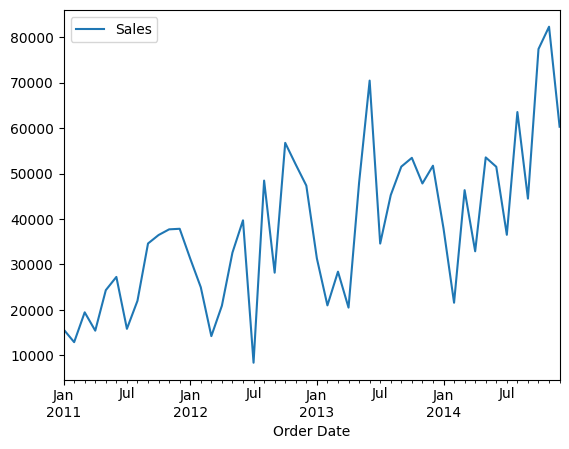

In [ ]:
df.plot()

# **Step 2** - Stationarity Analysis


In this part of the demonstration, we will perform tests on the time series data to understand whether it is stationary or not. The autoregressive modeling requires the time series data to be stationary. To test this, we will use the following test:
- Augmented Dickey–Fuller (ADF) test

### ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

Note that the null hypothesis for the ADF test is *`The time series is not stationary`*.

In [ ]:
result= adfuller(df['Sales'])

In [ ]:
result[1]

np.float64(0.1987628396941693)

If the $p$-value is < $0.05$, then our data is stationary otherwise our data is non-stationary

We have analyzed our time series data. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

In [ ]:
df.shape

(48, 1)

In [ ]:
df.head()

,Sales
Order Date,
2011-01-31,15711.7125
2011-02-28,12910.8588
2011-03-31,19472.5632
2011-04-30,15440.3046
2011-05-31,24348.9723


In [ ]:
df_train = df[0:42]
df_test = df[42:]

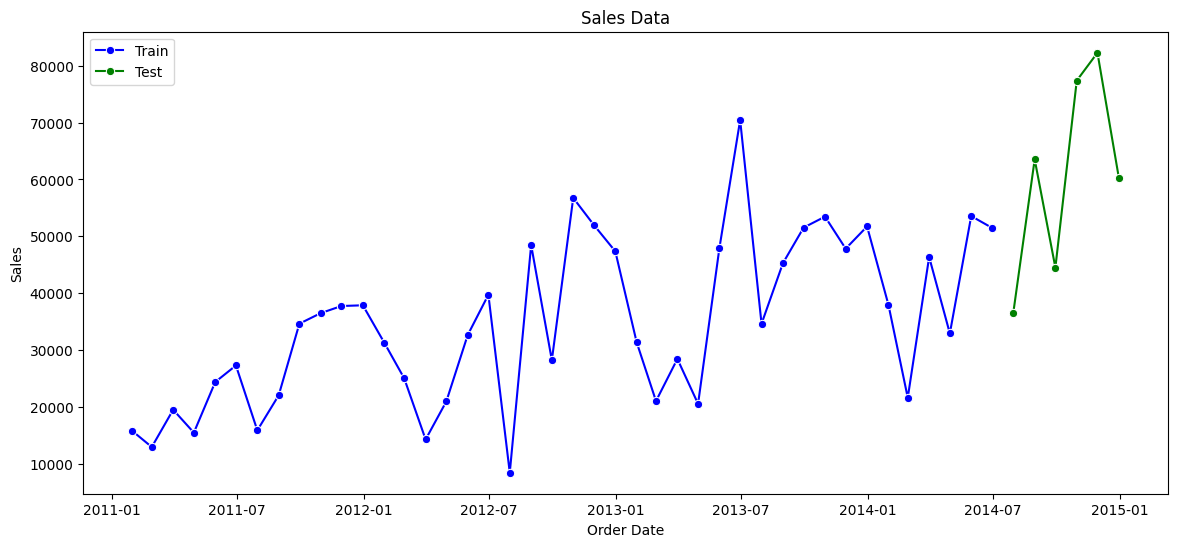

In [ ]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

# **Part 3** - Time Series Transformations


Now we will transform the time series data so that it ends up having a more stationary mean and variance. To do this, we will use the following data transformations:
- Box-Cox transformation - makes the variance constant in any time series data.
- Differencing - make the mean constant in any time series data

Box-Cox transformation is used to make the variance of a time series stationary and differencing is used to make its mean stationary. Note that although these methods can be executed in any order, differencing is done after Box-Cox transformation in general.

**Box-Cox Transformation**

The Box-Cox transformation is used to stabilize the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the **`boxcox`** method from **`scipy`** to implement this transformation.

In [ ]:
from scipy.stats import boxcox

In [ ]:
df_train['Sales']

,Sales
Order Date,
2011-01-31,15711.7125
2011-02-28,12910.8588
2011-03-31,19472.5632
2011-04-30,15440.3046
2011-05-31,24348.9723
2011-06-30,27260.0196
2011-07-31,15842.8317
2011-08-31,22012.2366
2011-09-30,34613.1849


Note that from here on out, we will only perform data transformations on the training data to avoid data leakage.

In [ ]:
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)

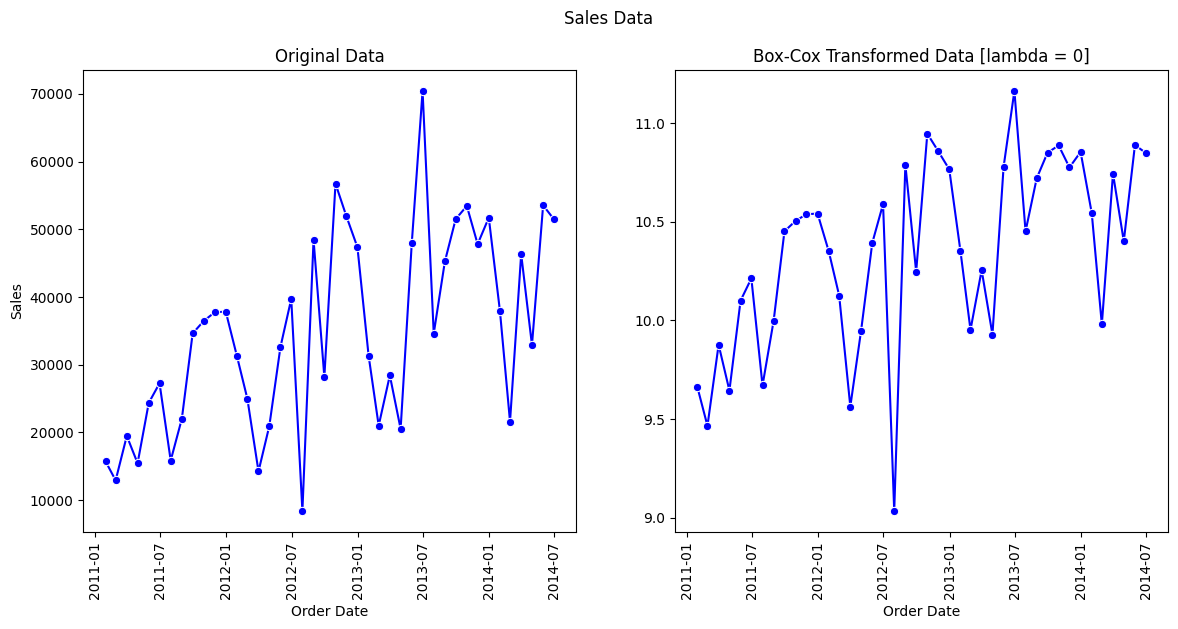

In [ ]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

**Differencing**

Differencing is used to stabilize the mean of a time series. It involves taking the difference of consecutive data points in the time series. If this process is executed once, it is known as first-order differencing. If done twice, it is called second-order differencing. And so on.

In [ ]:
df_differenced = df_train['Sales'].diff()

In [ ]:
df_differenced

,Sales
Order Date,
2011-01-31,NaN
2011-02-28,-2800.8537
2011-03-31,6561.7044
2011-04-30,-4032.2586
2011-05-31,8908.6677
2011-06-30,2911.0473
2011-07-31,-11417.1879
2011-08-31,6169.4049
2011-09-30,12600.9483


Note that differencing results in a missing value at the beginning of the series, but this is not of much consequence for the analysis.

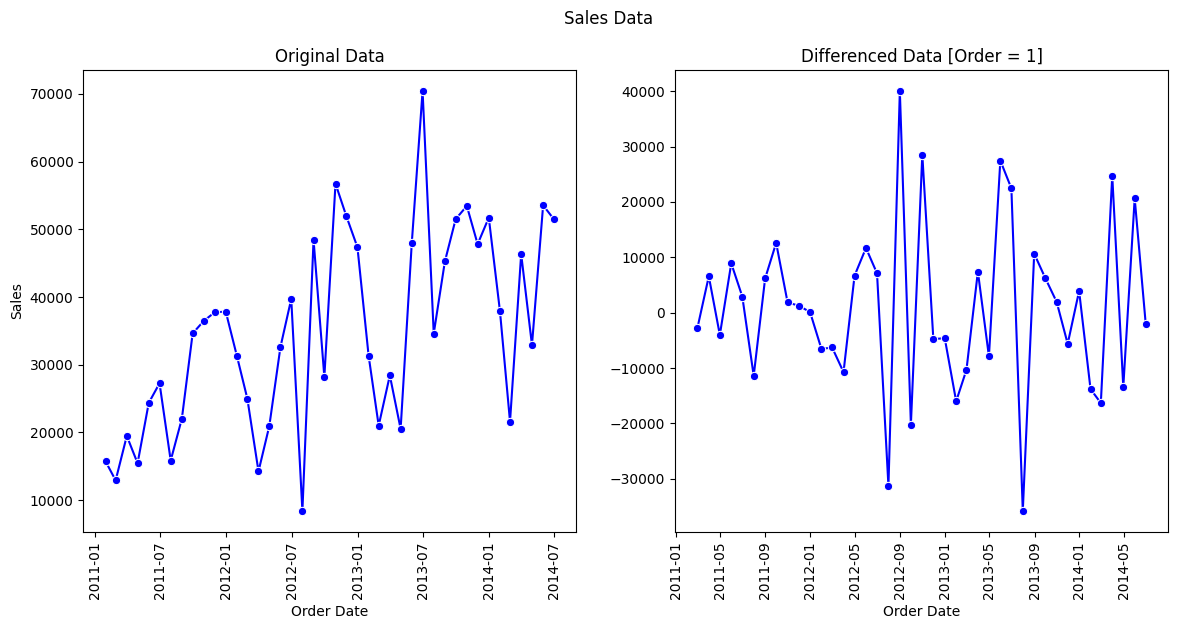

In [ ]:
# Plot the original time series data and its first-order differenced version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data');

We will continue with difference order $=1$ for the remainder of the demonstration. However, you are free to analyze the impact of other order values on the mean of the time series data.

**Differencing + Box Cox Transformation**

We will now apply the Box-Cox and the differencing transformations on the training data so that the data is ready for autoregressive time series modeling.

In [ ]:
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)
df_boxcox_diff = df_boxcox.diff()

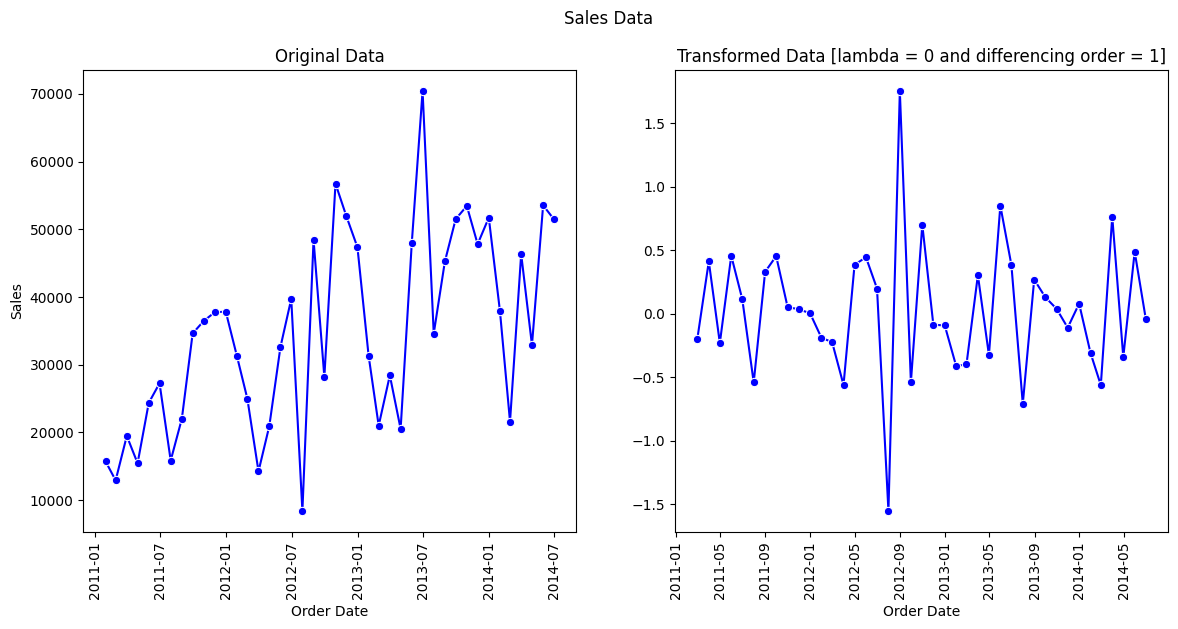

In [ ]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

#### **Run the Adfuller test on the data, again after transformation to check whether our data has become stationary or not.**


- `df_boxcox_diff` is the variable where we have that version of our Sales data which has gone through BoxCox transformation and differencing both.

- we take `df_boxcox_diff[1:]` because the first value is null so we are ignoring the first value and running the test on the rest of the values.


In [ ]:
result_after_transformation = adfuller(df_boxcox_diff[1:])

In [ ]:
result_after_transformation[1]  #p_value of the adfuller test after transformation

np.float64(7.4522117377521425e-06)

**Time Series Decomposition before and after transformation**

**1.Seasonal Decomposition of the data before transformation**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

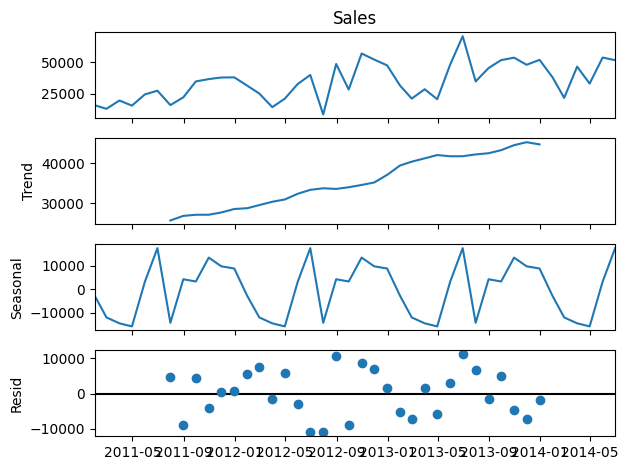

In [ ]:
seasonal_decompose(df_train['Sales']).plot();

**2.Seasonal Decomposition of the data after transformation**

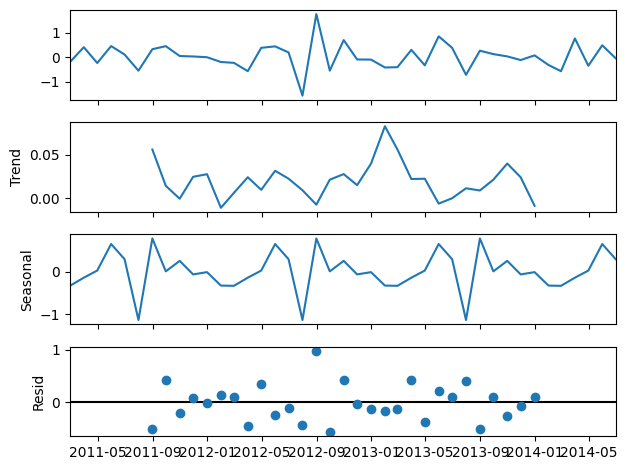

In [ ]:
seasonal_decompose(df_boxcox_diff[1:]).plot();

#**Step-4**: Autocorrelation Plots

In this part of the demonstration, we will compute and visualize the autocorrelation function (ACF) and the partial autocorrelation function (PACF) plots for the time series data.

**Autocorrelation Function (ACF) Plot**

The autocorrelation function (ACF) plot shows the autocorrelation values of a time series for different lag orders. Let's import the *`plot_acf`* method from *`statsmodels`* to implement this.

In [ ]:
# Import 'plot_acf' from 'statsmodels' to compute and visualize the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

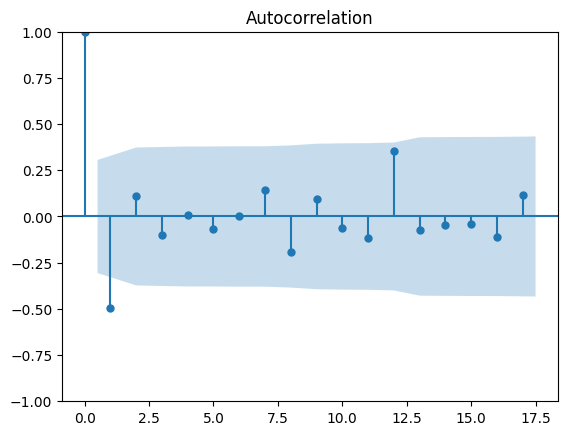

In [ ]:
plot_acf(df_boxcox_diff[1:]);

We can see a strong autocorrelation value at lag order $=1$. There is other lag order value where it is strong as well, such as $11$, but $1$ is the strongest.

In simple words, ACF measures the correlation between a time series with its lagged values.

If you have daily stock prices, the autocorrelation at lag 1 would measure how today's stock price relates to yesterday stock prices.

**Partial Autocorrelation Function (PACF) Plot**

The partial autocorrelation fucntion (PACF) plot shows the partial autocorrelation values of a time series for different lag orders. Partial autocorrelation is computed such that it ignores short-term correlations in the data. Let's import the plot_pacf method from statsmodels to implement this.

In [ ]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualize the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

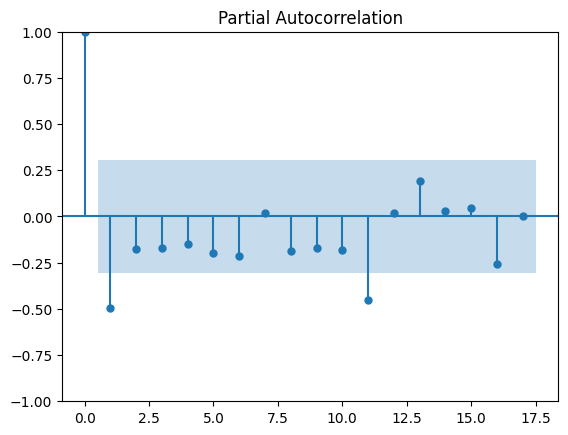

In [ ]:
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_pacf(df_boxcox_diff[1:]);

#**Step-5** - Autoregressive Models

In this part of the demonstration, we will fit autoregressive models to the data and anaylze their performance using RMSE and MAPE values. We will build the following models:

 * Autoregressive (AR)
 * Autoregressive integrated moving average (ARIMA)
 * Seasonal autoregressive integrated moving average (SARIMA)


###Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyze its performance. We will use the ARIMA method from statsmodels to build the model.

**Note**: The ARIMA method can also be used to implement other autoregressive models.

Let's import the `ARIMA` method from `statsmodels`.

In [ ]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Fit an AR model to the transformed training data with lag order 1 and view its optimal parameter values
# Note: You may try other suitable lag order values as well
ar_model = ARIMA(df_boxcox_diff, order = (1, 0, 0))
ar_model = ar_model.fit()

In [ ]:
# Obtain predictions from the AR model for the testing data indices
train_len = 42
ar_model_preds = ar_model.predict(start = train_len, end = len(df)-1)

In [ ]:
ar_model_preds

,predicted_mean
2014-07-31,0.065469
2014-08-31,0.014786
2014-09-30,0.039315
2014-10-31,0.027443
2014-11-30,0.033189
2014-12-31,0.030408


In [ ]:
df_test

,Sales
Order Date,
2014-07-31,36524.3028
2014-08-31,63521.7729
2014-09-30,44477.2662
2014-10-31,77379.8286
2014-11-30,82286.3583
2014-12-31,60292.1310


In [ ]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

In [ ]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum() #cummulative series
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0]) #initial value adjustment series

In [ ]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualize the predictions along with the data before computing error measures.

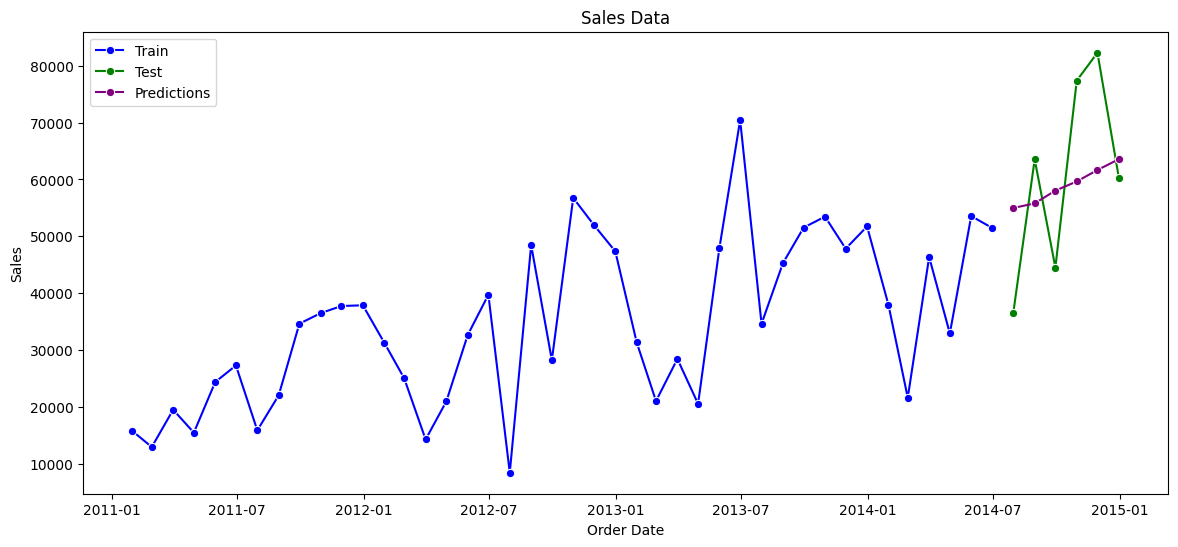

In [ ]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model. But to do that, we will first import the `mean_squared_error` function from `sklearn`.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Summarize the performance of the model on the test data using RMSE and MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = np.sqrt(mean_squared_error(
    y_true=df_test['Sales'],
    y_pred=df_preds.values[train_len:]
))

mape_ar = mape(df_test['Sales'], df_preds.values[train_len:])

performance_df = pd.DataFrame(
    {'RMSE':[round(rmse,2)], 'MAPE (%)':[round(mape_ar,2)]},
    index=['AR']
)

performance_df


,RMSE,MAPE (%)
AR,14915.16,24.42


**Autoregressive Integrated Moving Average (ARIMA) Method**

We will now a fit an autoregressive integrated moving average model to the training data and analyze its performance. We will use the `ARIMA` method from statsmodels to build the model.

**Note:** The `ARIMA` method can also be used to implement other autoregressive models.

The parameter of interest in the ARIMA method is the order parameter. It is a 3-tuple of the form  (p,d,q)  with the default value as  (0,0,0) .

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the  p  and  q  values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is  d  or the differencing order which we shall set as  1 .

**Note:** In ARIMA model, the differencing in already integrated, so we will use df_boxcox instead of df_boxcox_diff.



In [ ]:
# Fit an ARIMA model to the transformed training data with 'p = 1', 'd = 0' and 'q = 1' and view its optimal parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
arima_model = ARIMA(df_boxcox, order = (1, 0, 1))
arima_model = arima_model.fit()

In [ ]:
# Obtain predictions from the ARIMA model for the testing data indices
train_len = 42
arima_model_preds = arima_model.predict(start = train_len, end = len(df) - 1)

In [ ]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, arima_model_preds])

In [ ]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualize the predictions along with the data before computing error measures.

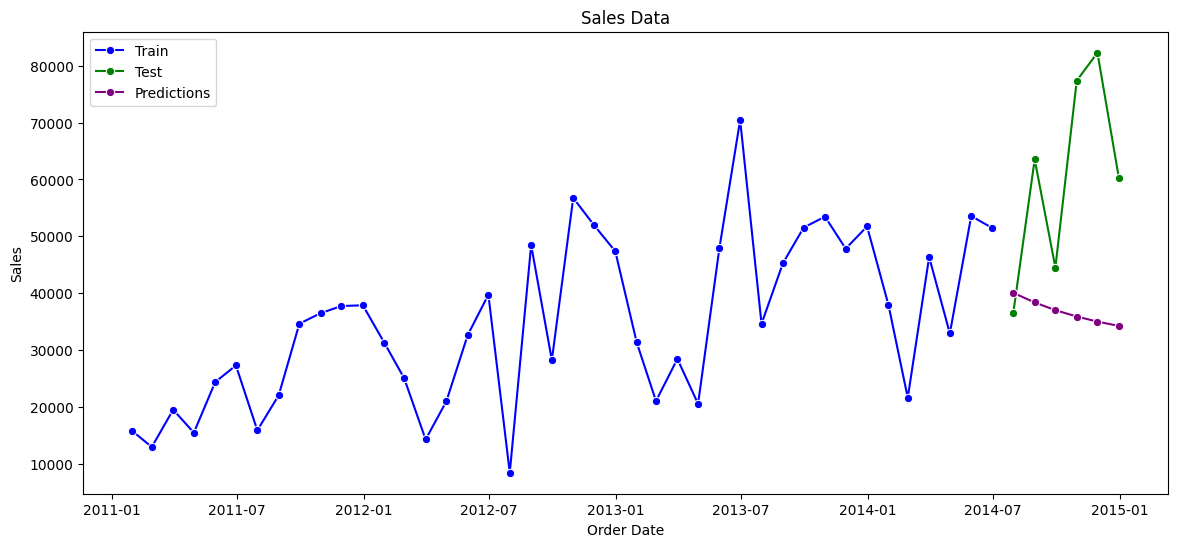

In [ ]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Let's compute performance metrics for the model.

In [ ]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(
    y_true=df_test['Sales'],
    y_pred=df_preds.values[train_len:]
))

mape_arima = mape(df_test['Sales'], df_preds.values[train_len:])

performance_df_temp = pd.DataFrame(
    {'RMSE':[round(rmse,2)], 'MAPE (%)':[round(mape_arima,2)]},
    index=['ARIMA']
)

performance_df = pd.concat([performance_df, performance_df_temp])
performance_df


,RMSE,MAPE (%)
AR,14915.16,24.42
ARIMA,29842.05,36.74


**Seasonal Autoregressive Integrated Moving Average (SARIMA) Method**

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyze its performance. We will use the `SARIMAX` method from `statsmodels` to build the model.

Let's import the `SARIMAX` method from `statsmodels`.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

The parameters of interest in the `SARIMAX` method are the order and the seasonal_order parameters. The order parameter is a 3-tuple of the form  (p,d,q)  with the default value as  (0,0,0)  and the seasonal_order parameter is a 4-tuple of the form  (P,D,Q,m)  with the default value as  (0,0,0,0) .

For the SARIMA method, we will specify all the values in the two tuples.

The seasonal_order parameter specifies the lag and difference orders for the seasonal component of the model, along with its period.

In [ ]:
# Note: We know that the seasonality period in the data is 'm = 12'
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
sarima_model = SARIMAX(df_boxcox, order = (1,0,1), seasonal_order = (1,0,1, 12))
sarima_model = sarima_model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Obtain predictions from the SARIMA model for the testing data indices
train_len = 42
sarima_model_preds = sarima_model.predict(start = train_len, end = len(df)-1)

In [ ]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, sarima_model_preds])

In [ ]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualize the predictions along with the data before computing error measures.

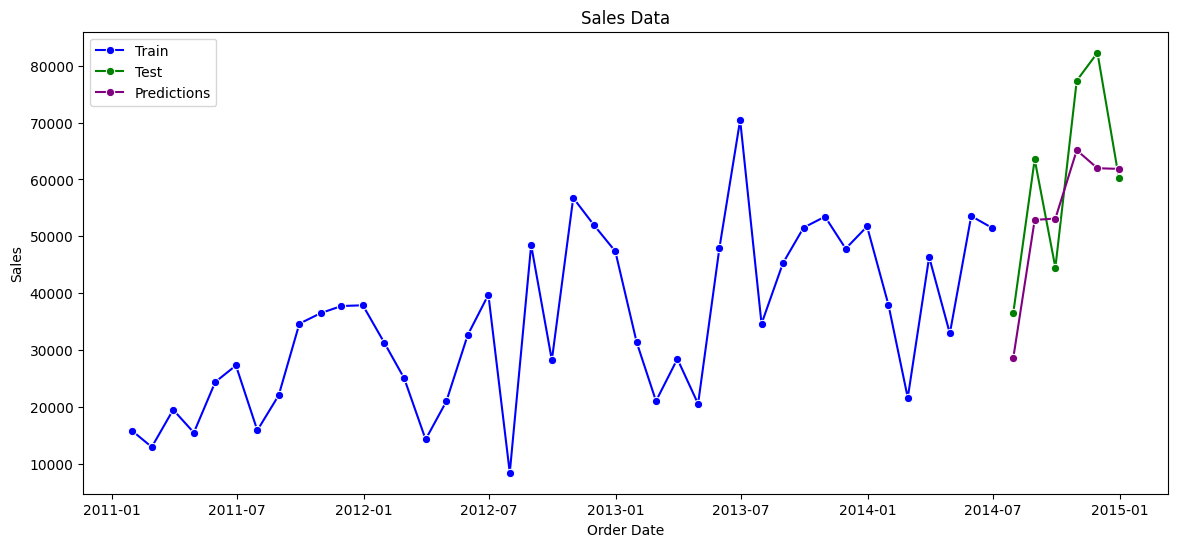

In [ ]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [ ]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(
    y_true=df_test['Sales'],
    y_pred=df_preds.values[train_len:]
))

mape_sarima = mape(df_test['Sales'], df_preds.values[train_len:])

performance_df_temp = pd.DataFrame(
    {'RMSE':[round(rmse,2)], 'MAPE (%)':[round(mape_sarima,2)]},
    index=['SARIMA']
)

performance_df = pd.concat([performance_df, performance_df_temp])
performance_df


,RMSE,MAPE (%)
AR,14915.16,24.42
ARIMA,29842.05,36.74
SARIMA,11661.76,16.82


## **Conclusion**

Among AR, ARIMA, and SARIMA models, the SARIMA model showed the best
forecasting performance based on RMSE and MAPE, making it suitable
for monthly sales forecasting with seasonality.